<a href="https://colab.research.google.com/github/chu-ise/378A-2022/blob/main/notebooks/07/01_sentiment_lexicon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis



## 감성 사전을 이용한 영화 리뷰 감성 분석

### NLTK Movie Reviews Dataset

In [1]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print('#review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print('#samples of file ids:', movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print('#categories of reviews:', movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('#num of "neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('#num of "pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환

fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('#id of the first review:', fileid)
print('#part of the first review:', movie_reviews.raw(fileid)[:500]) #첫번째 문서의 내용을 500자까지만 출력
print('#sentiment of the first review:', movie_reviews.categories(fileid)) #첫번째 문서의 감성

fileids = movie_reviews.fileids() #movie review data에서 file id를 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] #file id를 이용해 raw text file을 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
#review count: 2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews: ['neg', 'pos']
#num of "neg" reviews: 1000
#num of "pos" reviews: 1000
#id of the first review: neg/cv000_29416.txt
#part of the first review: plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder on

In [26]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import pandas as pd

plt.style.use('seaborn-pastel')

def model_performance(true_labels, predicted_labels, classes=['pos', 'neg']):
  conf_matrix=confusion_matrix(true_labels,predicted_labels)
  df_cm=pd.DataFrame(conf_matrix,index=classes,columns=classes)
  print("Accuracy: ",accuracy_score(true_labels,predicted_labels))
  print("Precison: ", precision_score(true_labels,predicted_labels, average='weighted'))
  print("Recall: ", recall_score(true_labels,predicted_labels, average='weighted'))
  print("F1 Score: ", f1_score(true_labels,predicted_labels, average='weighted'))
  print("Model Report: \n___________________________________________________",)
  print( classification_report(true_labels,predicted_labels))

  print("CONFUSION MATRIX: ")
  sn.heatmap(df_cm, annot=True)

### TextBlob을 이용한 감성 분석

- https://textblob.readthedocs.io/en/dev/quickstart.html

In [4]:
%%capture
%pip install -U textblob

In [5]:
from textblob import TextBlob

result = TextBlob(reviews[0])
print(result.sentiment)

Sentiment(polarity=0.06479782948532947, subjectivity=0.5188408350908352)


In [8]:
def sentiment_TextBlob(docs):
    results = []

    for doc in docs:
        testimonial = TextBlob(doc)
        if testimonial.sentiment.polarity > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

Accuracy:  0.6
Precison:  0.7225010902553423
Recall:  0.6
F1 Score:  0.5361560556566348
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         neg       0.89      0.23      0.36      1000
         pos       0.56      0.97      0.71      1000

    accuracy                           0.60      2000
   macro avg       0.72      0.60      0.54      2000
weighted avg       0.72      0.60      0.54      2000

CONFUSION MATRIX: 


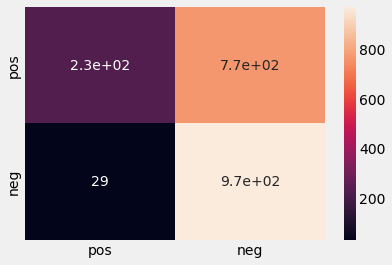

In [25]:
from sklearn.metrics import accuracy_score

model_performance(categories, sentiment_TextBlob(reviews))

### AFINN을 이용한 감성 분석

- https://github.com/fnielsen/afinn 
- http://corpustext.com/reference/sentiment_afinn.html

In [10]:
%%capture
%pip install afinn

Accuracy:  0.664
Precison:  0.6783880680137142
Recall:  0.664
F1 Score:  0.6570854714462421
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         neg       0.73      0.52      0.61      1000
         pos       0.63      0.81      0.71      1000

    accuracy                           0.66      2000
   macro avg       0.68      0.66      0.66      2000
weighted avg       0.68      0.66      0.66      2000

CONFUSION MATRIX: 


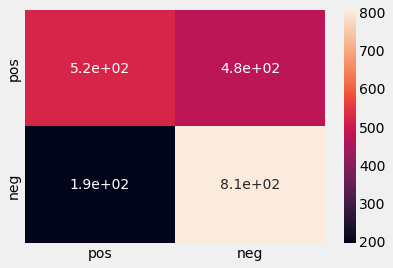

In [11]:
from afinn import Afinn

def sentiment_Afinn(docs):
    afn = Afinn(emoticons=True)
    results = []

    for doc in docs:
        if afn.score(doc) > 0:
            results.append('pos')
        else:
            results.append('neg')
    return results

model_performance(categories, sentiment_Afinn(reviews))

### VADER를 이용한 감성 분석

- https://github.com/cjhutto/vaderSentiment

In [13]:
%%capture
import nltk
nltk.download('vader_lexicon')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Accuracy:  0.6365
Precison:  0.659965124087232
Recall:  0.6365
F1 Score:  0.622662172868995
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         neg       0.72      0.45      0.55      1000
         pos       0.60      0.83      0.69      1000

    accuracy                           0.64      2000
   macro avg       0.66      0.64      0.62      2000
weighted avg       0.66      0.64      0.62      2000

CONFUSION MATRIX: 


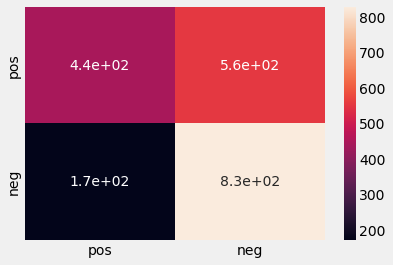

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(docs):
    analyser = SentimentIntensityAnalyzer()
    results = []

    for doc in docs:
        score = analyser.polarity_scores(doc)
        if score['compound'] > 0:
            results.append('pos')
        else:
            results.append('neg')

    return results

model_performance(categories, sentiment_vader(reviews))

## 학습을 통한 머신러닝 기반의 감성 분석

###  NLTK 영화 리뷰에 대한 머신러닝 기반 감성 분석


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews, categories, test_size=0.2, random_state=7)

print('Train set count: ', len(X_train))
print('Test set count: ', len(X_test))

Train set count:  1600
Test set count:  400


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf = TfidfVectorizer().fit(X_train) 

X_train_tfidf = tfidf.transform(X_train)
print('#Train set dimension:', X_train_tfidf.shape)
X_test_tfidf = tfidf.transform(X_test)
print('#Test set dimension:', X_test_tfidf.shape)

NB_clf = MultinomialNB(alpha=0.01)
NB_clf.fit(X_train_tfidf, y_train)
print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))

#Train set dimension: (1600, 36189)
#Test set dimension: (400, 36189)
#Train set score: 0.998
#Test set score: 0.797


Accuracy:  0.7975
Precison:  0.7975973149328733
Recall:  0.7975
F1 Score:  0.7975037968987305
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         neg       0.79      0.80      0.80       198
         pos       0.80      0.79      0.80       202

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

CONFUSION MATRIX: 


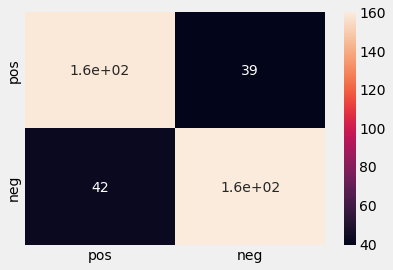

In [23]:
predicted_sentiments = NB_clf.predict(X_test_tfidf)
model_performance(y_test, predicted_sentiments)